<a target="_blank" href="https://colab.research.google.com/github/taobrienlbl/advanced_earth_science_data_analysis/blob/spring_2023_iub/lessons/12_spectral_analysis_continued/12_workalong_01_filter.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Simple filtering

This notebook demonstrates using the FFT to filter timeseries data.  It also demonstrates a higher-quality approach using a [Butterworth fitler](https://en.wikipedia.org/wiki/Butterworth_filter).

J: note this method of filtering is not great, and we use it because we are naive

In [2]:
""" Import libraries. """
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy.fft as fft

In [4]:
""" Load the data file. """

data_url = "https://raw.githubusercontent.com/taobrienlbl/advanced_earth_science_data_analysis/spring_2023_iub/lessons/11_spectral_analysis_intro/cannelton_flow.dat"

import pandas as pd

# load the data
data_pd = pd.read_csv(data_url, sep = "\t", skiprows = 30, names = ["agency", "id", "date", "discharge", "flag"], parse_dates=["date"])

data_pd.head()

,agency,id,date,discharge,flag
0,USGS,3303280,1975-10-01,94800,A
1,USGS,3303280,1975-10-02,79900,A
2,USGS,3303280,1975-10-03,69000,A
3,USGS,3303280,1975-10-04,74700,A
4,USGS,3303280,1975-10-05,71700,A


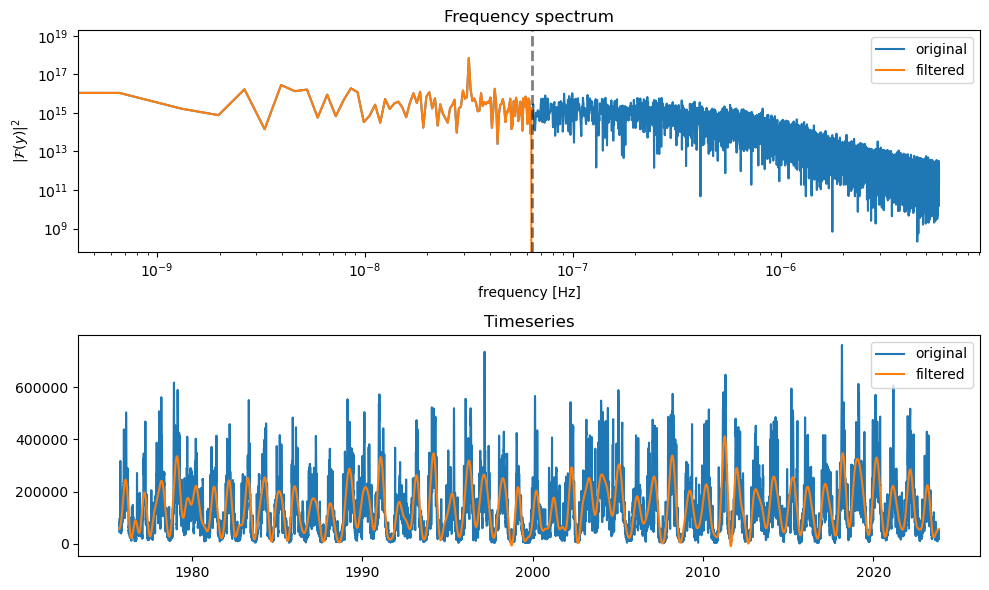

In [42]:
""" Filter the data using a naive cutoff filter. """

#get fourier transform of the data
#use fft.rfft()
discharge_fft = fft.rfft(data_pd["discharge"])

#get freqs
dt = 1 #1 day
dt = dt * 24 * 60**2 #seconds
freqs = fft.rfftfreq(len(data_pd["discharge"]), dt) #1/sec [Hz]

#define cutoff freq
cutoff_period = 0.5 #yrs
cutoff_period = cutoff_period * 365*24*60**2 #convert to secs
cutoff_freq = 1/cutoff_period #Hz

#find freqs higher than cutoff
i_high_freq = freqs > cutoff_freq

#set FFT to zero for those
discharge_fft_filtered = discharge_fft.copy()
discharge_fft_filtered[i_high_freq] = 0

#invert FFT to get filtered timeseries
discharge_filtered = fft.irfft(discharge_fft_filtered)

#check
#plt.plot(data_pd['date'], discharge_filtered)


#plot original and filtered spectrum (on top of each other?)
#fig, ax = plt.subplots()
#ax.plot(freqs,discharge_filtered) #add color="#990000"
#ax.set_xlabel("frequency [Hz]")
#ax.set_ylabel("$|\mathcal{F}(y)|^2$") #whew

#make log-log
fig, axs = plt.subplots(2, 1, figsize = (10,6))
ax = axs[0]
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("frequency [Hz]")
ax.set_ylabel("$|\mathcal{F}(y)|^2$") #whew
#ax.plot(freqs,discharge_fft, label = 'original')
#ax.plot(freqs, discharge_fft_filtered, label = 'filtered')
ax.plot(freqs,np.abs(discharge_fft)**2, label = 'original')#durga's method
ax.plot(freqs, np.abs(discharge_fft_filtered)**2, label = 'filtered')#durga's method
ax.set_title("Frequency spectrum")
ax.legend()
#add line at frequency of signal
ax.axvline(cutoff_freq, color = "black", linestyle = "--", alpha = 0.5, linewidth = 2, label = "cutoff frequency")


#plot original and filtered timeseries (on top of each other)
#fig, ax = plt.subplots(figsize = (9,4))
ax = axs[1]
ax.plot(data_pd['date'],data_pd["discharge"], label = 'original')
ax.plot(data_pd['date'],discharge_filtered, label = 'filtered')
ax.set_title("Timeseries")
ax.legend()


fig.tight_layout()
plt.show()

In [ ]:
""" Filter the data using a Butterworth filter. """

from scipy.signal import butter, filtfilt

# set the cutoff period
cutoff_period = 0.5 # years

# convert the cutoff period to a cutoff frequency (in Hz)
cutoff_freq = 1 / cutoff_period
cutoff_freq = cutoff_freq / (60*60*24*365.25)

# normalize the cutoff frequency by the Nyquist frequency
nyquist_freq = 1/(2*dt)
cutoff_freq_norm = cutoff_freq / nyquist_freq


# note that the cutoff frequency is normalized by the Nyquist frequency
# the Nyquist frequency is 1/(2*dt)
b, a = butter(filter_order, cutoff_freq_norm, btype='lowpass')


# apply a 5th order butterworth lowpass filter, allowing periods up to 0.5 years
# apply the filter
filtered_flow_butter = filtfilt(b, a, data['flow'])


In [ ]:
""" Calculate and plot the high-pass data """

#we can get high freq stuff by subtracting low freq stuff from original

#get high pass data
discharge_highpass = data_pd['discharge'] - discharge_filtered_butter


